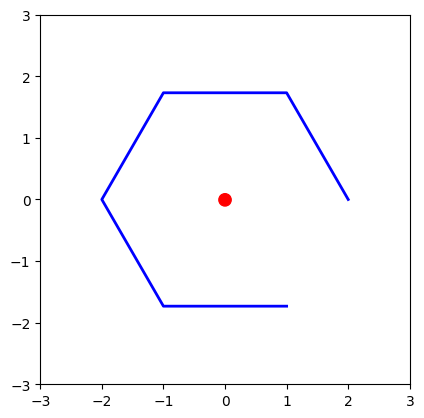

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# === Configuration ===
n_sides = 6  # Nombre de côtés du polygone
radius = 2   # Rayon du polygone
ball_radius = 0.1  # Rayon de la balle
rotation_speed = 0.05  # Vitesse de rotation
gravity = 0.02  # Force gravitationnelle

# === Calcul initial du polygone ===
angles = np.linspace(0, 2*np.pi, n_sides, endpoint=False)
polygon_x = radius * np.cos(angles)
polygon_y = radius * np.sin(angles)

# === Position initiale de la balle ===
ball_pos = np.array([0.0, 0.0])
ball_vel = np.array([0.0, 0.0])

# === Plot setup ===
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
polygon_patch, = ax.plot([], [], 'b-', lw=2)
ball_patch = plt.Circle(ball_pos, ball_radius, color='red')
ax.add_patch(ball_patch)

# === Animation update ===
def update(frame):
    global polygon_x, polygon_y, ball_pos, ball_vel

    # Rotation du polygone
    angle = rotation_speed * frame
    rot_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                           [np.sin(angle),  np.cos(angle)]])
    rotated = rot_matrix @ np.vstack((polygon_x, polygon_y))
    polygon_patch.set_data(rotated[0, :], rotated[1, :])

    # Mise à jour de la position de la balle
    ball_vel[1] -= gravity
    ball_pos += ball_vel * 0.1

    # Collision simple avec le bord (approximation)
    dist_from_center = np.linalg.norm(ball_pos)
    if dist_from_center + ball_radius > radius:
        normal = ball_pos / dist_from_center
        ball_vel = ball_vel - 2 * np.dot(ball_vel, normal) * normal
        ball_pos = normal * (radius - ball_radius)

    ball_patch.center = ball_pos
    return polygon_patch, ball_patch

# === Lancement de l'animation ===
ani = animation.FuncAnimation(fig, update, frames=500, interval=30, blit=True)
plt.show()

In [15]:
# Explore index.faiss
import faiss  # Librairie pour manipulation de vecteurs

# 📂 Chargement de l'index FAISS depuis le fichier binaire
index = faiss.read_index("../vectorstore/index.faiss")

# 🧮 Affiche la dimension des vecteurs (ex: 1536 pour OpenAI, 768 pour d'autres)
print("📐 Dimension des vecteurs :", index.d)

# 📊 Affiche combien de vecteurs sont stockés dans l'index
print("📦 Nombre total de vecteurs :", index.ntotal)

# 🔍 Récupère le vecteur de l'élément à la position 0 (le premier chunk indexé)
vec_0 = index.reconstruct(0)

# 🖨️ Affiche les 10 premières valeurs du vecteur pour aperçu
print("🔢 Vecteur 0 (aperçu des 10 premières dimensions) :", vec_0[:10])


📐 Dimension des vecteurs : 1536
📦 Nombre total de vecteurs : 1
🔢 Vecteur 0 (aperçu des 10 premières dimensions) : [-0.01958076 -0.00858437  0.01171458 -0.02487909 -0.0081643   0.03986616
 -0.00183612  0.00592504 -0.0164099  -0.01916069]
